## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [55]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [56]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [57]:
# 根據收入分成不同組別 (收入區間 - 還款與否)
Ann_data = app_train[['AMT_ANNUITY', 'TARGET']] # subset
Ann_data['ANN'] = Ann_data['AMT_ANNUITY'] 
print(Ann_data['ANN'].describe())


count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: ANN, dtype: float64


In [58]:
bin_cut=np.linspace(1600, 26000, 11)
Ann_data['ANN_BIN'] = pd.cut(Ann_data['ANN'], 
                                   bins=bin_cut)
print(Ann_data['ANN_BIN'].value_counts())

(23560.0, 26000.0]    23602
(21120.0, 23560.0]    23586
(16240.0, 18680.0]    21497
(11360.0, 13800.0]    21222
(18680.0, 21120.0]    20866
(8920.0, 11360.0]     20303
(13800.0, 16240.0]    19447
(6480.0, 8920.0]       9616
(4040.0, 6480.0]       3160
(1600.0, 4040.0]        347
Name: ANN_BIN, dtype: int64


In [59]:
Ann_groups  = Ann_data.groupby('ANN_BIN').mean()
Ann_groups

,AMT_ANNUITY,TARGET,ANN
ANN_BIN,,,
"(1600.0, 4040.0]",3434.641210,0.051873,3434.641210
"(4040.0, 6480.0]",5461.410759,0.058861,5461.410759
"(6480.0, 8920.0]",7586.764611,0.069572,7586.764611
"(8920.0, 11360.0]",9918.099074,0.071812,9918.099074
"(11360.0, 13800.0]",12823.791349,0.067760,12823.791349
"(13800.0, 16240.0]",15090.838278,0.075333,15090.838278
"(16240.0, 18680.0]",17368.907917,0.091222,17368.907917
"(18680.0, 21120.0]",19945.687770,0.082095,19945.687770
"(21120.0, 23560.0]",22291.154286,0.092258,22291.154286


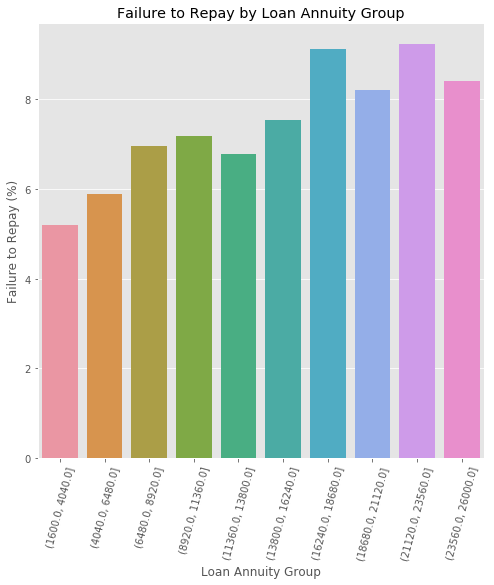

In [60]:
import seaborn as sns # 另一個繪圖-樣式套件

%matplotlib inline
plt.style.use('ggplot')
plt.figure(figsize = (8, 8))

# 以貸款年金為 x, target 為 y 繪製 barplot

px = Ann_groups.index
py = 100*Ann_groups['TARGET']
sns.barplot(px, py)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Loan Annuity Group'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Loan Annuity Group');